# This is a file intended to implement linear regression ML algorithm

## First lets start by reading the csv file and stoting the reading in a variable for later use

In [55]:
import csv

def read_csv_file(file_path):
    data = []
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        # header = next(reader)  # Read the header row and skip it

        for row in reader:
            # print(row)
            data.append(row)
    return data


# Example usage
csv_file_path = 'linear_regression_dataset.csv'
csv_data = read_csv_file(csv_file_path)
for i in range(1000):
    # print(csv_data[i][1], csv_data[i][7])
    csv_data[i] = [csv_data[i][1], csv_data[i][7]]

print(csv_data[:100])

[['carat', 'price'], ['0.23', '326'], ['0.21', '326'], ['0.23', '327'], ['0.29', '334'], ['0.31', '335'], ['0.24', '336'], ['0.24', '336'], ['0.26', '337'], ['0.22', '337'], ['0.23', '338'], ['0.3', '339'], ['0.23', '340'], ['0.22', '342'], ['0.31', '344'], ['0.2', '345'], ['0.32', '345'], ['0.3', '348'], ['0.3', '351'], ['0.3', '351'], ['0.3', '351'], ['0.3', '351'], ['0.23', '352'], ['0.23', '353'], ['0.31', '353'], ['0.31', '353'], ['0.23', '354'], ['0.24', '355'], ['0.3', '357'], ['0.23', '357'], ['0.23', '357'], ['0.23', '402'], ['0.23', '402'], ['0.23', '402'], ['0.23', '402'], ['0.23', '402'], ['0.23', '402'], ['0.23', '402'], ['0.31', '402'], ['0.26', '403'], ['0.33', '403'], ['0.33', '403'], ['0.33', '403'], ['0.26', '403'], ['0.26', '403'], ['0.32', '403'], ['0.29', '403'], ['0.32', '403'], ['0.32', '403'], ['0.25', '404'], ['0.29', '404'], ['0.24', '404'], ['0.23', '404'], ['0.32', '404'], ['0.22', '404'], ['0.22', '404'], ['0.3', '405'], ['0.3', '405'], ['0.3', '405'], ['0.

### lets plot the graph for some part of the dataset

[0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23, 0.3, 0.23, 0.22, 0.31, 0.2, 0.32, 0.3, 0.3, 0.3, 0.3, 0.3, 0.23, 0.23, 0.31, 0.31, 0.23, 0.24, 0.3, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.31, 0.26, 0.33, 0.33, 0.33, 0.26, 0.26, 0.32, 0.29, 0.32, 0.32, 0.25, 0.29, 0.24, 0.23, 0.32, 0.22, 0.22, 0.3, 0.3, 0.3, 0.3, 0.3, 0.35, 0.3, 0.3, 0.3, 0.42, 0.28, 0.32, 0.31, 0.31, 0.24, 0.24, 0.3, 0.3, 0.3, 0.3, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.38, 0.26, 0.24, 0.24, 0.24, 0.24, 0.32, 0.7, 0.86, 0.7, 0.71, 0.78, 0.7, 0.7, 0.96, 0.73]


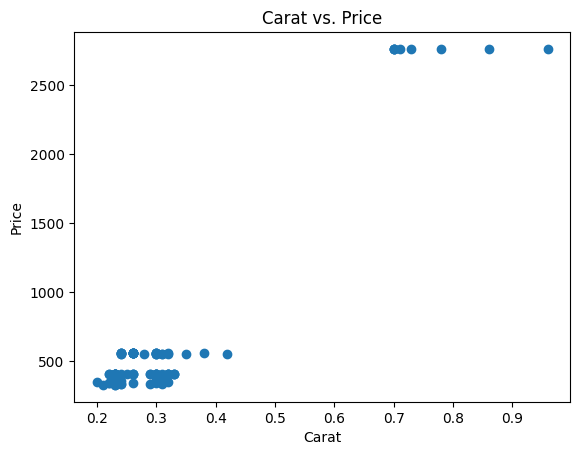

In [56]:
import matplotlib
import matplotlib.pyplot as plt

carat = [float(csv_data[i][0]) for i in range(1, 1000)]
price = [float(csv_data[i][1]) for i in range(1, 1000)]
print(carat)
plt.scatter(carat, price)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs. Price')
plt.show()





# let's create a class to implement the algorithm

In [69]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=1, num_iter=1000):
        self.learning_rate = learning_rate
        self.num_iter = num_iter


    def fit(self, X, y):
        n_samples = len(y)
        self.weights = np.zeros((X.shape[1], 1))
        self.bias = 0

        for _ in range(self.num_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = 1 / n_samples * np.dot(X.T, (y_pred - y))
            db = 1 / n_samples * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def fitter(self, X, y):
        self.weights = 0
        self.mean_x = sum(X) / len(X)
        self.mean_y = sum(y) / len(y)

        sum_x_minus = 0
        square_x_minus = 0
        for i in range(len(X)):
            sum_x_minus += (X[i] - self.mean_x)
            square_x_minus += (X[i] - self.mean_x)**2
        sum_y_minus = 0
        for i in range(len(y)):
            sum_y_minus += (y[i] - self.mean_y)
        self.weights = (sum_x_minus * sum_y_minus) / square_x_minus
        self.bias = - self.weights * self.mean_x + self.mean_y
    def predictor(self, x):
        return self.bias + x * self.weights
        
        

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
# lr = LinearRegression()

# carat = np.array(carat).reshape(-1, 1)
# price = np.array(price).reshape(-1, 1)

# lr.fitter(carat, price)

# print(lr.predictor(0.24))
# lr.fit(carat, price)
# print(lr.predictor(0.24))

            

## lets learn

In [72]:
import matplotlib.pyplot as plt
import numpy as np


# plt.scatter(carat, price)
# plt.xlabel('Carat')
# plt.ylabel('Price')
# plt.title('Carat vs. Price')
# x = np.linspace(carat.min(), carat.max(), 100)
# # Given values of m and c
lr = LinearRegression()

# carat = np.array(carat).reshape(-1, 1)
# price = np.array(price).reshape(-1, 1)


lr.fit(carat, price)
print(lr.predict(0.24))
m = lr.weights
c = lr.bias
print(m, c)

# Scatter plot


# Line plot
# y = m * x + c
# plt.plot(x, y, color='red')

# # Show the plot
# plt.show()

[[308.30678344]]
[[4323.81691901]] -729.409277126971
